In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import defaultdict

In [4]:
# Manually setting colors
custom_colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f', '#ff6666']

In [5]:
df = pd.read_csv('Data/final_data_exchange_bias.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 41 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   area/volume                                 979 non-null    float64
 1   h_range_max_koe                             979 non-null    float64
 2   Tc                                          979 non-null    float64
 3   temperature_k                               979 non-null    float64
 4   sat_em_g                                    979 non-null    float64
 5   coer_oe                                     979 non-null    float64
 6   mr (emu/g)                                  979 non-null    float64
 7   exc_bias_oe                                 979 non-null    float64
 8   exc_dir                                     979 non-null    float64
 9   ver_shift_emu_g                             979 non-null    float64
 10  ver_s_dir     

In [6]:
df.columns

Index(['area/volume', 'h_range_max_koe', 'Tc', 'temperature_k', 'sat_em_g',
       'coer_oe', 'mr (emu/g)', 'exc_bias_oe', 'exc_dir', 'ver_shift_emu_g',
       'ver_s_dir', 'fc_field_t', 'sphericity', 'max/min', 'core_b',
       'core_alpha', 'core_beta', 'core_gamma', 'shell_b', 'shell_alpha',
       'shell_beta', 'shell_gamma', 'num_of_magn_ions', 'Tn-Tb/Tn', 'Aex',
       'core_c/a', 'core_pauling_electronegativity',
       'shell_pauling_electronegativity', 'core_sum_vec',
       'core_sum_work_function', 'shell_sum_vec', 'shell_sum_work_function',
       'core_pauling_electronegativity_difference', 'core_vec_difference',
       'core_work_function_difference',
       'shell_pauling_electronegativity_difference', 'shell_vec_difference',
       'shell_work_function_difference', 'core', 'shell', 'formula'],
      dtype='object')

# Formula

In [7]:
# Defining categories based on composition
categories = {
    "Intermetallics": ["FeNi", "FeCo", "CoNi", "NiCo", "CoFe",  "FeNi", "FeCo", "CoNi", "NiCo", "CoFe"],
    "Complex oxides": ["Fe3O4", "MgFe2O4", "MnFe2O4", "CoFe2O4", "NiFe2O4", "LaFeO3", "BiFeO3"],
    "Core-shell": ["/", "@", "-", "–"],  # Композиты содержат различные связующие
    "Doped oxides": ["La", "Nd", "Sm", "Gd", "Dy", "Bi0.9", "Co0.", "Fe0.", "Ni0.", "Zn0."],
    "Metal Oxides": ["FeO", "CoO", "NiO", "MnO", "ZnO", "CuO", "CrO", "TiO2", "Fe2O3"],
    "Metals": ["Fe", "Co", "Ni", "Cu", "Ag", "Au", "Rh", "Pt"],
}

In [ ]:
# Function to classify the material
def classify_material(compound):
    for category, identifiers in categories.items():
        if any(identifier in compound for identifier in identifiers):
            return category
    return "Metals"  # Default return value for unclassified materials

In [ ]:
# Apply classification to the data
df['category'] = df['formula'].apply(classify_material)

# Count the number of materials in each category
category_counts = df['category'].value_counts()

# Total number of materials
total_count = category_counts.sum()

# Calculate percentage content
category_percentages = (category_counts / total_count) * 100

In [ ]:
# Set a threshold to classify small categories as "Others"
threshold = 1  # percentage
category_filtered = category_percentages[category_percentages >= threshold]
other_percentage = category_percentages[category_percentages < threshold].sum()

# Add "Others" if there are categories below the threshold
if other_percentage > 0:
    category_filtered['Others'] = other_percentage

# Remove categories with 0.0%
category_filtered = category_filtered[category_filtered > 0.0]

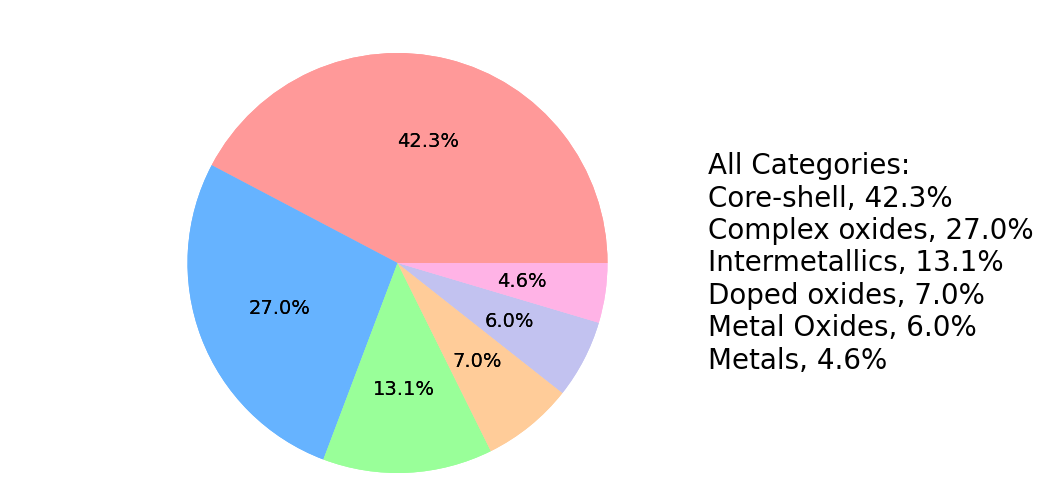

In [ ]:
# Create a pie chart
plt.figure(figsize=(10, 6))

# Increase the text size for percentages
wedges, texts, autotexts = plt.pie(
    category_filtered,
    labels=None,
    autopct=lambda p: f'{p:.1f}%' if p > 0 else '',
    colors=custom_colors,
    textprops=dict(color="black", fontsize=14)
)

# Increase the text size for percentages
wedges, texts, autotexts = plt.pie(category_filtered, labels=None, autopct=lambda p: f'{p:.1f}%' if p > 0 else '', colors=custom_colors, textprops=dict(color="black", fontsize=14))
plt.title(' ')
plt.axis('equal')  # Ensure the pie chart is circular

# Annotations to display the counts of all categories on the right
all_categories_content = '\n'.join([f'{label}, {category_percentages[label]:.1f}%' for label, count in category_counts.items()])
plt.text(0.9, 0.5, f'All Categories:\n{all_categories_content}', verticalalignment='center', horizontalalignment='left', fontsize=20, transform=plt.gca().transAxes)

for autotext in autotexts:
    autotext.set_color('black')

plt.show()

# Core

In [ ]:
print(df['core'].unique())

['ZnO' 'CoO' 'MnZn(FeO2)4' 'LaFeO3' 'Ni' 'Fe2CoO4' 'Co' 'FeRh' 'MnO2' 'Ag'
 'Fe' 'FeO' 'Fe3O4' 'NiO' 'Fe4Bi2O9' 'FeBiO3' 'TiO2' 'Fe13(CoO10)2'
 'Fe23Co7O40' 'Fe7Co3' 'FeCo' 'Fe3Co7' 'La2MnFeO6' 'VFeO4' 'Au'
 'GdTiFe9(Bi3O10)3' 'Sr11Nd39(CoO3)50' 'Fe2O3' 'Sr3La17(FeO3)20' 'Mn3O4'
 'Sr33La67Mn100O300' 'MnO' 'Co3O4' 'FeNi99O100' 'FeNi49O50' 'Mn(FeO2)2'
 'LaFe10(Bi3O10)3' 'Nd9Ho(FeO3)10' 'DyTiCrO5' 'GdTiCrO5' 'BaFe12O19'
 'Fe2NiO4' 'Cr2CoO4' 'FeNi' 'Mn' 'Fe5C2' 'FeNi3' 'Fe11C5' 'FeF2' 'CoP'
 'CrAgO2' 'Co2NiO4' 'Fe43Co7O50' 'GdZn4Fe39(NiO5)16' 'ScFe(BiO3)2'
 'SmMnO3' 'Er3Fe7(NiO4)50' 'Er3Fe2(NiO4)25' 'Er9Fe(NiO4)50' 'Gd'
 'ZnNi99O100' 'Zn3Ni97O100' 'ZnNi19O20' 'Al' 'Ga' 'Mn2O3' 'Cr2O3' 'Ti'
 'Fe3Co9O4' 'Fe11Co49O80' 'FeCo24' 'Fe6Co19' 'Fe23Co77' 'Ca' 'CaSmMn2O6'
 'MgO' 'AlNi3' 'Fe19O60' 'Fe17O60' 'FeO4' 'Fe7O30' 'Cr2CuO4' 'Ce' 'Pr'
 'Nd' 'FeCoO' 'FeCoNiO' 'CrO2' 'CrO3' 'MnGeTe' 'CuO' 'CaSm' 'CaMnO3'
 'CaNdMn2O6' 'CrN' 'CoNiO' 'MnPt' 'LiFe3O4' 'Li3(Fe3O4)2' 'Cr2Te3'
 'PrFeO3' 'NdFeO3' 'SmFeO

4

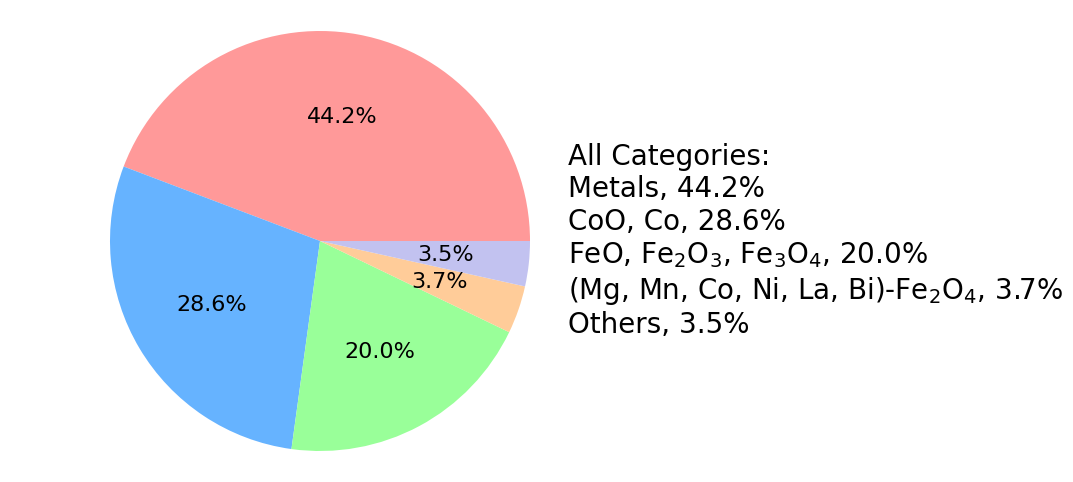

In [ ]:
# Defining categories based on composition
categories = {
"(Mg, Mn, Co, Ni, La, Bi)-Fe$_2$O$_4$": ["MgFe2O4", "MnFe2O4", "CoFe2O4", "NiFe2O4", "LaFeO3"],
"FeO, Fe$_2$O$_3$, Fe$_3$O$_4$": ['Fe3O4', "FeO", "Fe2O3"],
"CoO, Co": ["CoO", 'Co'],
"Metals": ["Fe", "Co", "Ni", "Cu", "Ag", "Au", "Rh", "Pt", 'Ti', 'Al', 'Ga', 'Ca', 'Gd', 'Mn', 'Ce', 'Pr', 'Nd', 'Sm'],
'Others': []
    }
# Function to classify material
def classify_material(compound):
    for category, identifiers in categories.items():
        if any(identifier in compound for identifier in identifiers):
            return category
    return "Others"

# Applying classification to the data
df['category'] = df['core'].apply(classify_material)

# Counting the number of materials in each category
category_counts = df['category'].value_counts()

# Total number of materials
total_count = category_counts.sum()

# Calculating percentage composition
category_percentages = (category_counts / total_count) * 100

# Setting a threshold to classify small categories under "Others"
threshold = 1  # percentage
category_filtered = category_percentages[category_percentages >= threshold]
other_percentage = category_percentages[category_percentages < threshold].sum()

# Adding "Others"
if other_percentage > 0:
    category_filtered['Others'] = other_percentage

# Removing categories with 0.0%
category_filtered = category_filtered[category_filtered > 0.0]

# Plotting the pie chart
plt.figure(figsize=(8, 6))

wedges, texts, autotexts = plt.pie(category_filtered, labels=None, autopct='%1.1f%%', colors=custom_colors, textprops=dict(color="black", fontsize=16))
plt.axis('equal')  # To make the circle actually circular

# Annotations to display the count of all categories on the right
all_categories_content = '\n'.join([f'{label}, {category_percentages[label]:.1f}%' for label, count in category_counts.items()])
plt.text(0.9, 0.5, f'All Categories:\n{all_categories_content}', verticalalignment='center', horizontalalignment='left', fontsize=20, transform=plt.gca().transAxes)

for autotext in autotexts:
    autotext.set_color('black')

plt.show()

In [ ]:
# Checking values before plotting the chart
print("Percentage of 'Others':", other_percentage)
print("Percentage of all categories:", category_filtered)

Percentage of 'Others': 0.0
Percentage of all categories: category
Metals                                  44.228805
CoO, Co                                 28.600613
FeO, Fe$_2$O$_3$, Fe$_3$O$_4$           20.020429
(Mg, Mn, Co, Ni, La, Bi)-Fe$_2$O$_4$     3.677222
Others                                   3.472932
Name: count, dtype: float64


# Shell

In [8]:
print(df['shell'].unique())

['Fe2CoO4' '0' 'NiO' 'FeBiO3' 'CoO' 'Fe3O4' 'Fe2O3' 'Fe4Bi2O9'
 'LaMn0.5Fe0.5O3' 'LaMn0.5Fe0.5O4' 'LaMn0.5Fe0.5O5' 'LaMn0.5Fe0.5O6' 'CuO'
 'SiO2' 'Co3O4' 'Mn3O4' 'Fe2NiO4' 'Mn2CoO4' 'MnO' 'MgO' 'Mo' 'Co' 'Fe'
 'CoNiO' 'Fe6CoO10' 'Mn(FeO2)2' 'Zn(FeO2)8' 'Zn(FeO2)4' 'Zn3(FeO2)8'
 'Zn(FeO2)2' 'FeO' 'Ag' 'Cr' 'LaFeO3' 'Mn2O3' 'Fe4CoNiO8' 'Fe2Co' 'ZnO'
 'Ni(HO)2' 'Mn19NiO20' 'Mn187Ni13O200' 'Mn91Ni9O100' 'Mn9NiO10' 'BaTiO3'
 'Fe37(Co19O50)2' 'Fe41Co159O400' 'Fe101Co99O400' 'Fe7Co13O40' 'Fe3Co9O16'
 'La2MnCoO6' 'CO' 'MgCo' 'Mn3Cr17O30' 'Ni' 'Mn' 'Cr2O3' 'Zn2Fe10Co3O20'
 'ZnFe4CoO8' 'Zn3Fe10(CoO10)2' 'Zn17Fe50(Co2O25)4' 'Zn3Fe8CoO16'
 'Zn41Fe100Co9O200' 'La2MnO6' 'Cr(FeO3)2' 'FeCo' 'CrO2' 'Co2NiO4' 'MnF2'
 'Au' 'MnO3' 'GS' 'MnO2' 'Fe2CuO4' 'CoNi' 'ZnFeO' 'FeTe' 'Fe200Te79'
 'Fe250Te63' 'Fe8Te9' 'FeTe2']


In [ ]:
# Define categories based on composition
categories = {
"Without shell": ['0'],
"Ni$_x$Mn$_{1-x}$O, Mn$_3$O$_4$, CoMn$_2$O$_4$, MnO": ['Mn', 'Mn0.05', 'Mn0.15', 'Mn0.25', 'Mn0.3', 'CoMn2O4', 'MnO', 'Mn3O4', 'Ni0.05Mn0.95O', 'Ni0.065Mn0.935O', 'Ni0.08Mn0.92O', 'Ni0.09Mn0.91O', 'Ni0.1Mn0.9O'],
"(Mg, Mn, Co, Ni, Bi)-Fe$_2$O$_4$": ["MgFe2O4", "MnFe2O4", 'Mn(FeO2)2', "CoFe2O4", "NiFe2O4"],
'Others': [],
"FeO, Fe$_2$O$_3$, Fe$_3$O$_4$": ['Fe3O4', "FeO", "Fe2O3"],
"Co$_{1-x}$Fe$_x$Fe$_2$O$_4$, CoO, Co": ["CoO", 'Co', 'Co0.4Fe2.6O4', 'Co0.7Fe2.3O4', 'Co0.8Fe2.2O4', 'Co1.52Fe1.48O4', 'Co1.59Fe0.41O4', 'Co0.99Fe1.01O4', 'Co1.3Fe0.7O4', 'Co2.25Fe0.75O4', 'Co0.6Fe2.4O4', 'Mn0.30Cr1.7O3', 'Co0.58Fe2.28O4'],
"Metals": ["Fe", 'Mo', "Co", "Ni", "Cu", "Ag", "Au", "Rh", "Pt", 'Ti', 'Al', 'Ga', 'Ca', 'Gd', 'Mn', 'Ce', 'Pr', 'Nd', 'Sm'],

}

# Function to classify material
def classify_material(compound):
    if isinstance(compound, str):  # Check if the value is a string
        for category, identifiers in categories.items():
            if any(identifier in compound for identifier in identifiers):
                return category
    return "Others"

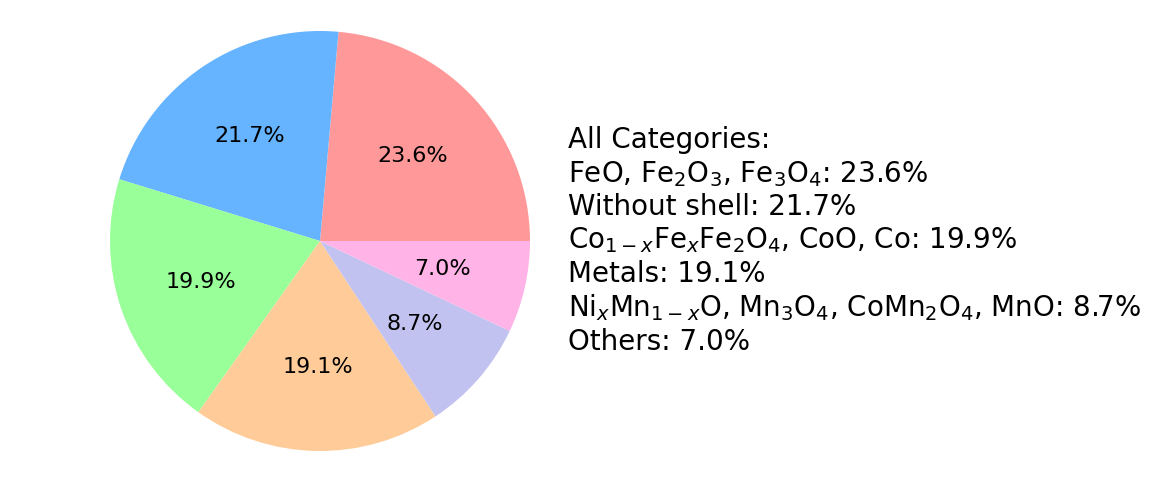

In [13]:
# Apply classification to data
df['category'] = df['shell'].apply(classify_material)

# Count the number of materials in each category
category_counts = df['category'].value_counts()

# Total number of materials
total_count = category_counts.sum()

# Calculate percentage composition
category_percentages = (category_counts / total_count) * 100

# Set a threshold for grouping small categories into "Others"
threshold = 1  # percentage
category_filtered = category_percentages[category_percentages >= threshold]
other_percentage = category_percentages[category_percentages < threshold].sum()

# Add "Others" if there are any small categories
if other_percentage > 0:
    category_filtered['Others'] = other_percentage

# Remove categories with 0.0%
category_filtered = category_filtered[category_filtered > 0.0]

# Create a pie chart
plt.figure(figsize=(8, 6))

# Create pie chart with category percentages
wedges, texts, autotexts = plt.pie(category_filtered, labels=None, autopct=lambda p: f'{p:.1f}%', colors=custom_colors, textprops=dict(color="black", fontsize=16))

# Ensure the pie chart is circular
plt.axis('equal')

# Manually add annotation for the full breakdown on the right
all_categories_content = '\n'.join([f'{label}: {category_percentages[label]:.1f}%' for label in category_filtered.index])
plt.text(0.9, 0.5, f'All Categories:\n{all_categories_content}', verticalalignment='center', horizontalalignment='left', fontsize=20, transform=plt.gca().transAxes)

# Customize colors and appearance
for autotext in autotexts:
    autotext.set_color('black')

# Show the pie chart
plt.show()

In [ ]:
print("Percentage of 'Others':", other_percentage)
print("Percentage of all categories:", category_filtered)

Percentage of 'Others': 0.0
Percentage of all categories: category
FeO, Fe$_2$O$_3$, Fe$_3$O$_4$                         23.595506
Without shell                                         21.654750
Co$_{1-x}$Fe$_x$Fe$_2$O$_4$, CoO, Co                  19.918284
Metals                                                19.101124
Ni$_x$Mn$_{1-x}$O, Mn$_3$O$_4$, CoMn$_2$O$_4$, MnO     8.682329
Name: count, dtype: float64
